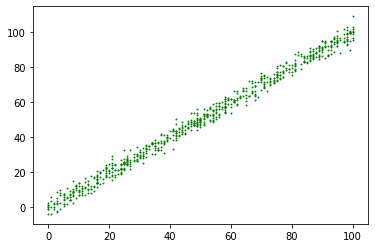

In [185]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

use_kaggle_data = True


data_train = pd.read_csv('/home/gyr/file/course/DL-Basic-Material/Notes/MyNotes/Data/train.csv')
train_x = data_train['x']
train_y = data_train['y']
plt.plot(train_x, train_y, 'go', markersize=0.9)
plt.show()

if use_kaggle_data == False:
	values_x = [i for i in range(11)]
	train_x = np.array(values_x, dtype=np.float32)
	train_x = train_x.reshape(-1, 1)

	values_y = [2*i + 1 for i in values_x]
	train_y = np.array(values_y, dtype=np.float32)
	train_y = train_y.reshape(-1, 1)

In [186]:
train_x = np.array(train_x, dtype=np.float32)
train_y = np.array(train_y, dtype=np.float32)
print(len(train_x))
train_x = train_x.reshape(-1, 1)
train_y = train_y.reshape(-1, 1)
print(len(train_x))

699
699


In [187]:
import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):
	def __init__(self, inputSize, outputSize):
		super(linearRegression, self).__init__()
		self.linear = torch.nn.Linear(inputSize, outputSize)

	def forward(self, x):
		out = self.linear(x)
		return out

In [188]:
inputDim = 1
outputDim = 1
lr = 0.0001
epochs = 10000


In [189]:
model = linearRegression(inputDim, outputDim)
if torch.cuda.is_available():
	model.cuda()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [190]:
for epoch in range(epochs):
	if torch.cuda.is_available():
		inputs = Variable(torch.from_numpy(train_x).cuda())
		labels = Variable(torch.from_numpy(train_y).cuda())
	else:
		inputs = Variable(torch.from_numpy(train_x))
		labels = Variable(torch.from_numpy(train_y))

	optimizer.zero_grad()

	outputs = model(inputs)
	loss = criterion(outputs, labels)
	
	loss.backward()
	optimizer.step()
	print("epoch:{}, loss:{}".format(epoch, loss.item()))


epoch:0, loss:6138.546875
epoch:1, loss:684.2930297851562
epoch:2, loss:82.6304702758789
epoch:3, loss:16.260631561279297
epoch:4, loss:8.939319610595703
epoch:5, loss:8.131686210632324
epoch:6, loss:8.042584419250488
epoch:7, loss:8.032739639282227
epoch:8, loss:8.031639099121094
epoch:9, loss:8.031502723693848
epoch:10, loss:8.031474113464355
epoch:11, loss:8.031455993652344
epoch:12, loss:8.031439781188965
epoch:13, loss:8.03142261505127
epoch:14, loss:8.03140640258789
epoch:15, loss:8.031390190124512
epoch:16, loss:8.031373977661133
epoch:17, loss:8.031356811523438
epoch:18, loss:8.031340599060059
epoch:19, loss:8.03132438659668
epoch:20, loss:8.031307220458984
epoch:21, loss:8.031291961669922
epoch:22, loss:8.031275749206543
epoch:23, loss:8.031258583068848
epoch:24, loss:8.031242370605469
epoch:25, loss:8.03122615814209
epoch:26, loss:8.031209945678711
epoch:27, loss:8.031192779541016
epoch:28, loss:8.031176567077637
epoch:29, loss:8.031160354614258
epoch:30, loss:8.0311441421508

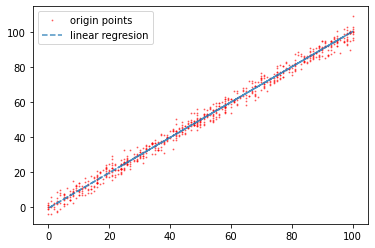

In [193]:
with torch.no_grad():
	if torch.cuda.is_available():
		predicted = model(Variable(torch.from_numpy(train_x).cuda())).cpu().data.numpy()
	else:
		predicted = model(Variable(torch.from_numpy(train_x))).data.numpy()

import matplotlib.pyplot as plt
plt.clf()
plt.plot(train_x, train_y, 'ro', label = 'origin points', alpha = 0.5, markersize = 0.9)
plt.plot(train_x, predicted, '--', label = 'linear regresion', alpha=0.8)
plt.legend(loc='best')
plt.show()